**YOUR NAMES HERE**

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Week 4: Batch normalization and learning rate decay

The continued focus this week is on strategies for training deep neural networks.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

2025-03-13 21:44:57.181055: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 21:45:02.107757: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Task 9. Batch normalization

Batch normalization is one of the most powerful techniques for effectively training very deep neural networks. Let's implement batch normalization in the deep learning library and experiment with how integrating it with VGG networks affects classification accuracy on CIFAR-10.

### 9a. Implement batch normalization

Implement the following methods / make the following changes:

**Layer:**
- Constructor: If you have not already done so, make instance variables for the two batch normalization related parameters.
- `is_doing_batchnorm`
- `init_batchnorm_params`: Initialize the batch normalization parameters. The gain, bias, mean, and standard deviation.
- `__call__`: Update how you compute the forward pass through the layer. If we are doing batch norm AND the batch norm moving mean is not `None`, perform batch normalization on the net input before the layer's activation is computed.

**Dense**:
- `compute_batch_norm(net_in, eps=0.001)`: Updates the running mini-batch mean and standard deviation during training and performs batch normalization on the net input signal.

**Conv2D**:
- `compute_batch_norm(net_in, eps=0.001)`: Updates the running mini-batch mean and standard deviation during training and performs batch normalization on the net input signal.

**VGGConvBlock** and **VGGDenseBlock**:
- In the constructors, pass along the `do_batch_norm` parameter to constituent layers.

#### Test: `Dense` batch norm

In [2]:
from layers import Dense

In [3]:
print(30*'-', 'Test: Dense w/ linear (not training)', 30*'-')

tf.random.set_seed(0)
dense = Dense('Test', units=5, prev_layer_or_block=None, wt_init='he', activation='linear', do_batch_norm=True)
dense(tf.ones([1, 3]))
dense.init_batchnorm_params()

tf.random.set_seed(1)
net_acts = dense(tf.random.uniform([2, 3]))
print(f'Your net_acts (not in training mode) are\n{net_acts}')
print('They should be:')
print('''[[ 0.1316 -0.1246  0.867  -0.0392 -0.1553]
 [ 0.1964 -0.0568  0.3891 -0.4167 -0.5647]]''')

print(30*'-', 'Test: Dense w/ ReLU (not training)', 30*'-')

tf.random.set_seed(0)
dense = Dense('Test', units=5, prev_layer_or_block=None, wt_init='he', do_batch_norm=True)
dense(tf.ones([1, 3]))
dense.init_batchnorm_params()

tf.random.set_seed(1)
net_acts = dense(tf.random.uniform([2, 3]))
print(f'Your net_acts (not in training mode) are\n{net_acts}')
print('They should be:')
print('''[[0.1861 0.     1.2261 0.     0.    ]
 [0.2777 0.     0.5503 0.     0.    ]]''')

------------------------------ Test: Dense w/ linear (not training) ------------------------------


2025-03-13 19:20:22.664704: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20601 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


Your net_acts (not in training mode) are
[[ 0.1316 -0.1246  0.867  -0.0392 -0.1553]
 [ 0.1964 -0.0568  0.3891 -0.4167 -0.5647]]
They should be:
[[ 0.1316 -0.1246  0.867  -0.0392 -0.1553]
 [ 0.1964 -0.0568  0.3891 -0.4167 -0.5647]]
------------------------------ Test: Dense w/ ReLU (not training) ------------------------------
Your net_acts (not in training mode) are
[[0.1861 0.     1.2261 0.     0.    ]
 [0.2777 0.     0.5503 0.     0.    ]]
They should be:
[[0.1861 0.     1.2261 0.     0.    ]
 [0.2777 0.     0.5503 0.     0.    ]]


In [4]:
print(30*'-', 'Test: Dense w/ linear (training)', 30*'-')
tf.random.set_seed(0)
dense = Dense('Test', units=4, prev_layer_or_block=None, wt_init='he', activation='linear', do_batch_norm=True)
dense(tf.ones([1, 6]))
dense.init_batchnorm_params()

dense.set_mode(True)

tf.random.set_seed(1)
net_acts = dense(tf.random.uniform([3, 6]))
print(f'Your net_acts (in training mode) are\n{net_acts}')
print('They should be:')
print('''[[-1.2303  1.1081 -0.1128  1.1738]
 [ 1.2109  0.16   -1.1564 -1.2605]
 [ 0.0194 -1.2681  1.2692  0.0866]]''')

print(30*'-', 'Test: Dense w/ ReLU (training)', 30*'-')
tf.random.set_seed(0)
dense = Dense('Test', units=5, prev_layer_or_block=None, wt_init='he', do_batch_norm=True)
dense(tf.ones([1, 3]))
dense.init_batchnorm_params()

dense.set_mode(True)

tf.random.set_seed(1)
net_acts = dense(tf.random.uniform([2, 3]))
print(f'Your net_acts (in training mode) are\n{net_acts}')
print('They should be:')
print('''[[0.     0.     0.9971 0.9963 0.9966]
 [0.9787 0.9796 0.     0.     0.    ]]''')

------------------------------ Test: Dense w/ linear (training) ------------------------------


Your net_acts (in training mode) are
[[-1.2303  1.1081 -0.1128  1.1738]
 [ 1.2109  0.16   -1.1564 -1.2605]
 [ 0.0194 -1.2681  1.2692  0.0866]]
They should be:
[[-1.2303  1.1081 -0.1128  1.1738]
 [ 1.2109  0.16   -1.1564 -1.2605]
 [ 0.0194 -1.2681  1.2692  0.0866]]
------------------------------ Test: Dense w/ ReLU (training) ------------------------------
Your net_acts (in training mode) are
[[0.     0.     0.9971 0.9963 0.9966]
 [0.9787 0.9796 0.     0.     0.    ]]
They should be:
[[0.     0.     0.9971 0.9963 0.9966]
 [0.9787 0.9796 0.     0.     0.    ]]


In [5]:
print(30*'-', 'Test: Dense w/ ReLU multiple mini-batches', 30*'-')
tf.random.set_seed(0)
dense = Dense('Test', units=5, prev_layer_or_block=None, wt_init='he', do_batch_norm=True)
dense(tf.ones([1, 3]))
dense.init_batchnorm_params()

dense.set_mode(True)

tf.random.set_seed(1)
for i in range(5):
    net_acts = dense(tf.random.uniform([2, 3]))
print(f'Your net_acts after some mini-batches are\n{net_acts}')
print('They should be:')
print('''[[0.9975 0.9953 0.     0.     0.    ]
 [0.     0.     0.9984 0.9953 0.9946]]''')

dense.set_mode(False)

tf.random.set_seed(2)
net_acts1 = dense(tf.random.uniform([2, 3]))
net_acts2 = dense(tf.random.uniform([2, 3]))

print('After processing mini-batches in non-training mode, the net_acts are:')
print(net_acts1.numpy())
print(net_acts2.numpy())
print('and should be:')
print('''[[0.2089 0.     0.5334 0.     0.    ]
 [0.2175 0.     1.505  0.     0.    ]]
[[0.8584 0.0224 1.0932 0.     0.    ]
 [1.1234 0.2351 0.2997 0.     0.    ]]''')


------------------------------ Test: Dense w/ ReLU multiple mini-batches ------------------------------


Your net_acts after some mini-batches are
[[0.9975 0.9953 0.     0.     0.    ]
 [0.     0.     0.9984 0.9953 0.9946]]
They should be:
[[0.9975 0.9953 0.     0.     0.    ]
 [0.     0.     0.9984 0.9953 0.9946]]
After processing mini-batches in non-training mode, the net_acts are:
[[0.2089 0.     0.5334 0.     0.    ]
 [0.2175 0.     1.505  0.     0.    ]]
[[0.8584 0.0224 1.0932 0.     0.    ]
 [1.1234 0.2351 0.2997 0.     0.    ]]
and should be:
[[0.2089 0.     0.5334 0.     0.    ]
 [0.2175 0.     1.505  0.     0.    ]]
[[0.8584 0.0224 1.0932 0.     0.    ]
 [1.1234 0.2351 0.2997 0.     0.    ]]


#### Test: `Conv2D` batch norm

In [6]:
from layers import Conv2D

In [7]:
print(30*'-', 'Test: Conv2D w/ linear (not training)', 30*'-')

tf.random.set_seed(0)
conv = Conv2D('Test', units=4, kernel_size=(2, 2), prev_layer_or_block=None, wt_init='he', activation='linear',
              do_batch_norm=True)
conv(tf.ones([1, 2, 2, 3]))
conv.init_batchnorm_params()

tf.random.set_seed(1)
net_acts = conv(tf.random.uniform([2, 2, 2, 3]))
print(f'Your net_acts (not in training mode) are\n{net_acts}')
print('They should be:')
print('''[[[[-0.4583  0.3257 -0.7078 -0.3702]
   [-0.1189  0.2832 -0.1614 -0.0745]]

  [[ 0.4845  0.4109 -0.5069 -0.2724]
   [ 0.1433  0.2664 -0.2008 -0.0392]]]


 [[[-0.2477  0.4331 -0.2983 -0.2121]
   [-0.0728  0.2052 -0.1844  0.1303]]

  [[ 0.2266  0.4893 -0.3521 -0.0567]
   [ 0.0542  0.0702 -0.0703 -0.0319]]]]''')

------------------------------ Test: Conv2D w/ linear (not training) ------------------------------


2025-03-13 19:20:28.154738: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90400


Your net_acts (not in training mode) are
[[[[-0.4583  0.3257 -0.7078 -0.3702]
   [-0.1189  0.2832 -0.1614 -0.0745]]

  [[ 0.4845  0.4109 -0.5069 -0.2724]
   [ 0.1433  0.2664 -0.2008 -0.0392]]]


 [[[-0.2477  0.4331 -0.2983 -0.2121]
   [-0.0728  0.2052 -0.1844  0.1303]]

  [[ 0.2266  0.4893 -0.3521 -0.0567]
   [ 0.0542  0.0702 -0.0703 -0.0319]]]]
They should be:
[[[[-0.4583  0.3257 -0.7078 -0.3702]
   [-0.1189  0.2832 -0.1614 -0.0745]]

  [[ 0.4845  0.4109 -0.5069 -0.2724]
   [ 0.1433  0.2664 -0.2008 -0.0392]]]


 [[[-0.2477  0.4331 -0.2983 -0.2121]
   [-0.0728  0.2052 -0.1844  0.1303]]

  [[ 0.2266  0.4893 -0.3521 -0.0567]
   [ 0.0542  0.0702 -0.0703 -0.0319]]]]


In [8]:
print(30*'-', 'Test: Conv2D w/ linear (training)', 30*'-')

tf.random.set_seed(0)
conv = Conv2D('Test', units=4, kernel_size=(2, 2), prev_layer_or_block=None, wt_init='he', activation='linear',
              do_batch_norm=True)
conv(tf.ones([1, 2, 2, 3]))
conv.init_batchnorm_params()

conv.set_mode(True)

tf.random.set_seed(1)
net_acts = conv(tf.random.uniform([2, 2, 2, 3]))
print(f'Your net_acts (not in training mode) are\n{net_acts}')
print('They should be:')
print('''[[[[-1.6719  0.1188 -2.0219 -1.6977]
   [-0.4375 -0.2133  0.7571  0.2757]]

  [[ 1.7572  0.7852 -1.     -1.0448]
   [ 0.5163 -0.3449  0.5564  0.5117]]]


 [[[-0.9058  0.9583  0.0608 -0.6427]
   [-0.2695 -0.8235  0.64    1.6431]]

  [[ 0.8191  1.3981 -0.2129  0.3946]
   [ 0.1922 -1.8786  1.2204  0.5601]]]]''')


------------------------------ Test: Conv2D w/ linear (training) ------------------------------
Your net_acts (not in training mode) are
[[[[-1.6719  0.1188 -2.0219 -1.6977]
   [-0.4375 -0.2133  0.7571  0.2757]]

  [[ 1.7572  0.7852 -1.     -1.0448]
   [ 0.5163 -0.3449  0.5564  0.5117]]]


 [[[-0.9058  0.9583  0.0608 -0.6427]
   [-0.2695 -0.8235  0.64    1.6431]]

  [[ 0.8191  1.3981 -0.2129  0.3946]
   [ 0.1922 -1.8786  1.2204  0.5601]]]]
They should be:
[[[[-1.6719  0.1188 -2.0219 -1.6977]
   [-0.4375 -0.2133  0.7571  0.2757]]

  [[ 1.7572  0.7852 -1.     -1.0448]
   [ 0.5163 -0.3449  0.5564  0.5117]]]


 [[[-0.9058  0.9583  0.0608 -0.6427]
   [-0.2695 -0.8235  0.64    1.6431]]

  [[ 0.8191  1.3981 -0.2129  0.3946]
   [ 0.1922 -1.8786  1.2204  0.5601]]]]


In [9]:
print(30*'-', 'Test: Conv2D w/ ReLU multiple mini-batches', 30*'-')
tf.random.set_seed(0)
conv = Conv2D('Test', units=4, kernel_size=(2, 2), prev_layer_or_block=None, wt_init='he', do_batch_norm=True)
conv(tf.ones([1, 2, 2, 3]))
conv.init_batchnorm_params()

conv.set_mode(True)

tf.random.set_seed(1)
for i in range(5):
    net_acts = conv(tf.random.uniform([2, 2, 2, 3]))
print(f'Your net_acts after some mini-batches are\n{net_acts}')
print('They should be:')
print('''[[[[0.     0.     0.252  0.    ]
   [0.     0.1891 1.3142 0.4295]]

  [[1.1739 0.     0.0018 0.4892]
   [0.7065 0.     0.2646 0.7403]]]


 [[[0.     1.7817 0.     0.    ]
   [0.     0.447  0.8604 0.5298]]

  [[1.1745 0.8703 0.     0.5416]
   [0.7664 0.     0.2116 0.6486]]]]''')

------------------------------ Test: Conv2D w/ ReLU multiple mini-batches ------------------------------


Your net_acts after some mini-batches are
[[[[0.     0.     0.252  0.    ]
   [0.     0.1891 1.3142 0.4295]]

  [[1.1739 0.     0.0018 0.4892]
   [0.7065 0.     0.2646 0.7403]]]


 [[[0.     1.7817 0.     0.    ]
   [0.     0.447  0.8604 0.5298]]

  [[1.1745 0.8703 0.     0.5416]
   [0.7664 0.     0.2116 0.6486]]]]
They should be:
[[[[0.     0.     0.252  0.    ]
   [0.     0.1891 1.3142 0.4295]]

  [[1.1739 0.     0.0018 0.4892]
   [0.7065 0.     0.2646 0.7403]]]


 [[[0.     1.7817 0.     0.    ]
   [0.     0.447  0.8604 0.5298]]

  [[1.1745 0.8703 0.     0.5416]
   [0.7664 0.     0.2116 0.6486]]]]


In [10]:
conv.set_mode(False)

tf.random.set_seed(2)
for i in range(2):
    net_acts = conv(tf.random.uniform([2, 2, 2, 3]))

print('After processing mini-batches in non-training mode, the net_acts are:')
print(net_acts.numpy())
print('and should be:')
print('''[[[[0.     0.0107 0.     0.    ]
   [0.     0.2271 0.3021 0.    ]]

  [[0.0629 0.0541 0.     0.0349]
   [0.     0.3308 0.     0.1565]]]


 [[[0.     0.4355 0.     0.    ]
   [0.     0.     0.2244 0.4117]]

  [[0.0396 0.2184 0.     0.058 ]
   [0.4179 0.3454 0.     0.    ]]]]''')


After processing mini-batches in non-training mode, the net_acts are:
[[[[0.     0.0107 0.     0.    ]
   [0.     0.2271 0.3021 0.    ]]

  [[0.0629 0.0541 0.     0.0349]
   [0.     0.3308 0.     0.1565]]]


 [[[0.     0.4355 0.     0.    ]
   [0.     0.     0.2244 0.4117]]

  [[0.0396 0.2184 0.     0.058 ]
   [0.4179 0.3454 0.     0.    ]]]]
and should be:
[[[[0.     0.0107 0.     0.    ]
   [0.     0.2271 0.3021 0.    ]]

  [[0.0629 0.0541 0.     0.0349]
   [0.     0.3308 0.     0.1565]]]


 [[[0.     0.4355 0.     0.    ]
   [0.     0.     0.2244 0.4117]]

  [[0.0396 0.2184 0.     0.058 ]
   [0.4179 0.3454 0.     0.    ]]]]


### 9b. Create VGG networks that use batch normalization

In `vgg_nets.py`, create the `VGG4Plus`, `VGG15Plus`, and `VGG15PlusPlus` networks. These are the same as the corresponding nets you have already implemented, except these networks have batch normalization throughout in the conv and dense layers. The `VGG15PlusPlus` network differs from `VGG15Plus` in the use of dropout in the all of the conv blocks (not just before the final dense layer). This should be quick with some copy-pasting.

**NOTE:** If your net_acts below are off in some cases by one number in the right-most least significant decimal place **that is fine!**.

In [11]:
from vgg_nets import VGG4Plus, VGG15Plus, VGG15PlusPlus

#### Test: VGG4Plus

In [12]:
v = VGG4Plus(C=3, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 3]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 3]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 16384]
MaxPool2D layer output(maxpool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
```


In [13]:
tf.random.set_seed(0)
v = VGG4Plus(C=3, input_feats_shape=(32, 32, 5), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([2, 32, 32, 5]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.2328 0.6381 0.1291]
 [0.2    0.6335 0.1664]]''')

Your net_acts are
[[0.2329 0.638  0.129 ]
 [0.2002 0.6335 0.1664]] and should be
[[0.2328 0.6381 0.1291]
 [0.2    0.6335 0.1664]]


#### Test: VGG15Plus

In [14]:
v = VGG15Plus(C=7, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 7]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0) shape: [1, 4, 4, 512]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_2) shape: [1, 4, 4, 256]
	

The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 7]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock4:
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock4/conv2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv0) shape: [1, 2, 2, 512]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock3/conv2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 4, 4, 512]
ConvBlock3:
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv2) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 8, 8, 256]
ConvBlock2:
	MaxPool2D layer output(ConvBlock2/maxpool2) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv0) shape: [1, 16, 16, 128]
ConvBlock1:
	MaxPool2D layer output(ConvBlock1/maxpool2) shape: [1, 16, 16, 64]
	Conv2D layer output(ConvBlock1/conv1) shape: [1, 32, 32, 64]
	Conv2D layer output(ConvBlock1/conv0) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
```


In [15]:
tf.random.set_seed(0)
v = VGG15Plus(C=7, input_feats_shape=(32, 32, 3), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([2, 32, 32, 3]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.0607 0.0949 0.0982 0.0789 0.3175 0.091  0.2587]
 [0.0693 0.0891 0.0968 0.0766 0.3231 0.0881 0.257 ]]''')

Your net_acts are
[[0.0607 0.0949 0.0982 0.0789 0.3174 0.091  0.2588]
 [0.0694 0.0891 0.0968 0.0766 0.3229 0.0881 0.2571]] and should be
[[0.0607 0.0949 0.0982 0.0789 0.3175 0.091  0.2587]
 [0.0693 0.0891 0.0968 0.0766 0.3231 0.0881 0.257 ]]


#### Test: VGG15PlusPlus

In [16]:
v = VGG15PlusPlus(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	Dropout layer output(conv_block_5/dropout_layer_2) shape: [1, 1, 1, 512]
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	Dropout layer output(conv_block_4/dropout_layer_2) shape: [1, 2, 2, 512]
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer 

The above should print:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 5]
DenseBlock1:
	Dropout layer output(DenseBlock1/dropout) shape: [1, 512]
	Dense layer output(DenseBlock1/dense0) shape: [1, 512]
Flatten layer output(flat) shape: [1, 512]
ConvBlock4:
	Dropout layer output(ConvBlock4/dropout) shape: [1, 1, 1, 512]
	MaxPool2D layer output(ConvBlock4/maxpool2) shape: [1, 1, 1, 512]
	Conv2D layer output(ConvBlock4/conv2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv1) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock4/conv0) shape: [1, 2, 2, 512]
ConvBlock3:
	Dropout layer output(ConvBlock3/dropout) shape: [1, 2, 2, 512]
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 2, 2, 512]
	Conv2D layer output(ConvBlock3/conv2) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 4, 4, 512]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 4, 4, 512]
ConvBlock3:
	Dropout layer output(ConvBlock3/dropout) shape: [1, 4, 4, 256]
	MaxPool2D layer output(ConvBlock3/maxpool2) shape: [1, 4, 4, 256]
	Conv2D layer output(ConvBlock3/conv2) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv1) shape: [1, 8, 8, 256]
	Conv2D layer output(ConvBlock3/conv0) shape: [1, 8, 8, 256]
ConvBlock2:
	Dropout layer output(ConvBlock2/dropout) shape: [1, 8, 8, 128]
	MaxPool2D layer output(ConvBlock2/maxpool2) shape: [1, 8, 8, 128]
	Conv2D layer output(ConvBlock2/conv1) shape: [1, 16, 16, 128]
	Conv2D layer output(ConvBlock2/conv0) shape: [1, 16, 16, 128]
ConvBlock1:
	Dropout layer output(ConvBlock1/dropout) shape: [1, 16, 16, 64]
	MaxPool2D layer output(ConvBlock1/maxpool2) shape: [1, 16, 16, 64]
	Conv2D layer output(ConvBlock1/conv1) shape: [1, 32, 32, 64]
	Conv2D layer output(ConvBlock1/conv0) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
```


In [17]:
tf.random.set_seed(0)
v = VGG15PlusPlus(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
tf.random.set_seed(1)
net_acts = v(tf.random.uniform([2, 32, 32, 3]))

print(f'Your net_acts are\n{net_acts.numpy()} and should be')
print('''[[0.0962 0.2981 0.2029 0.3189 0.0838]
 [0.0893 0.2785 0.2156 0.3299 0.0868]]''')

Your net_acts are
[[0.0963 0.298  0.203  0.319  0.0838]
 [0.0893 0.2785 0.2155 0.33   0.0867]] and should be
[[0.0962 0.2981 0.2029 0.3189 0.0838]
 [0.0893 0.2785 0.2156 0.3299 0.0868]]


### 9c. Trial run of training VGG4Plus, VGG15Plus, and VGG15PlusPlus on CIFAR-10

Load in CIFAR-10 below and train the 3 networks that use batch normalization for `1` epoch. Use the AdamW optimizer and otherwise keep default hyperparameters. Print out the test accuracy after teach training run. You should get (*approximately*):

```
VGG4Plus test acc: 61.41
VGG15Plus test acc: 37.71
VGG15PlusPlus test acc: 22.29
```



In [5]:
from datasets import get_dataset

In [22]:
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('cifar10', val_prop=0.2)
vgg4plus = VGG4Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
vgg4plus.compile()
vgg15plus = VGG15Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
vgg15plus.compile()
vgg15plusplus = VGG15PlusPlus(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
vgg15plusplus.compile()

# train each
train_loss_hist, val_loss_hist, val_acc_hist, e = vgg4plus.fit(x_train, y_train, x_val, y_val,max_epochs=1)
train_loss_hist, val_loss_hist, val_acc_hist, e = vgg15plus.fit(x_train, y_train, x_val, y_val, max_epochs=1)
train_loss_hist, val_loss_hist, val_acc_hist, e = vgg15plusplus.fit(x_train, y_train, x_val, y_val, max_epochs=1)

---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2,

Epoch 1/1: Train Loss: 1.8911, Val Loss: 1.3700, Val Acc: 0.5148, Time: 4.17s
Finished training after 1 epochs!


Epoch 1/1: Train Loss: 178.4986, Val Loss: 6.5328, Val Acc: 0.1012, Time: 16.60s
Finished training after 1 epochs!


2025-03-13 19:24:50.922157: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incond/else/_1/cond/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/1: Train Loss: 198.7646, Val Loss: 23.7599, Val Acc: 0.1012, Time: 16.26s
Finished training after 1 epochs!


In [23]:
# print out test accuracy
print(vgg4plus.evaluate(x_test, y_test, batch_sz=128)[0])
print(vgg15plus.evaluate(x_test, y_test, batch_sz=128)[0])
print(vgg15plusplus.evaluate(x_test, y_test, batch_sz=128)[0])

tf.Tensor(0.51322114, shape=(), dtype=float32)


tf.Tensor(0.1000601, shape=(), dtype=float32)


tf.Tensor(0.1000601, shape=(), dtype=float32)


### 9d. Train VGG4Plus, VGG15Plus, and VGG15PlusPlus on CIFAR-10

Now that the networks have been tested, do a full training session with the following networks on CIFAR-10:
- VGG4Plus
- VGG15
- VGG15Plus
- VGG15PlusPlus

Use default hyperparameters except:
- Use AdamW optimizer.
- Use He initialization
- Use a patience of `4`. *If your earlier early stopping test did not end in the same number of epochs as the test code, you might want to try a patience of 5 or 6.*

After training each net, store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).
4. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the network to help prevent the memory used from growing.

Training these networks should take ~30 minutes.

In [0]:
from vgg_nets import VGG15

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Import your dataset function and VGG models
# Assuming these are already imported in your notebook

# Seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Set up empty lists to store all results
results = []
all_models = ["VGG4Plus", "VGG15", "VGG15Plus", "VGG15PlusPlus"]

# Get dataset with validation split
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('cifar10', val_prop=0.2)

# Loop through each model to train
for model_idx, model_type in enumerate(all_models):
    # Clear session to free memory
    tf.keras.backend.clear_session()
    
    # Set random seed with slight offset for each model
    current_seed = SEED + model_idx
    tf.random.set_seed(current_seed)
    np.random.seed(current_seed)
    
    print(f"\n{'='*20} Training {model_type} {'='*20}")
    
    # Initialize the appropriate model
    if model_type == "VGG4Plus":
        model = VGG4Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15":
        model = VGG15(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15Plus":
        model = VGG15Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15PlusPlus":
        model = VGG15PlusPlus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    
    # Compile with AdamW optimizer
    model.compile(optimizer='adamw')
    
    # Train the model
    start_time = time.time()
    print(f"Starting training for {model_type}...")
    
    # Train with early stopping (patience=4)
    train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(
        x_train, y_train, 
        x_val, y_val, 
        max_epochs=100,    # Large value since we're using early stopping
        patience=4,        # As specified in the requirements
        verbose=True       # Show progress
    )
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test)
    print(f"{model_type} Test Accuracy: {test_acc:.4f}")
    
    # Store results
    result = {
        'model_type': model_type,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'train_loss_history': train_loss_hist,
        'val_loss_history': val_loss_hist,
        'val_acc_history': val_acc_hist,
        'epochs': epochs,
        'training_time': training_time
    }
    results.append(result)
    
    # Save individual results in case notebook crashes
    np.save(f"{model_type}_results.npy", result)
    print(f"Saved results for {model_type}")


==================== Training VGG4Plus ====================
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
Starting training for VGG4Plus...


Epoch 1/100: Train Loss: 1.7189, Val Loss: 1.2848, Val Acc: 0.5476, Time: 4.22s


Epoch 2/100: Train Loss: 1.2756, Val Loss: 1.1097, Val Acc: 0.6122, Time: 2.12s


Epoch 3/100: Train Loss: 1.0807, Val Loss: 1.0634, Val Acc: 0.6315, Time: 2.16s


Epoch 4/100: Train Loss: 0.9631, Val Loss: 1.0109, Val Acc: 0.6485, Time: 2.13s


Epoch 5/100: Train Loss: 0.8539, Val Loss: 0.9893, Val Acc: 0.6633, Time: 2.13s


Epoch 6/100: Train Loss: 0.7906, Val Loss: 0.9914, Val Acc: 0.6682, Time: 2.12s


Epoch 7/100: Train Loss: 0.7019, Val Loss: 1.0078, Val Acc: 0.6694, Time: 2.12s


Epoch 8/100: Train Loss: 0.6366, Val Loss: 1.0333, Val Acc: 0.6738, Time: 2.13s
Finished training after 8 epochs!
Training completed in 19.16 seconds (0.32 minutes)


VGG4Plus Test Accuracy: 0.6654
Saved results for VGG4Plus

==================== Training VGG15 ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_

Epoch 1/100: Train Loss: 1.9909, Val Loss: 1.6460, Val Acc: 0.3475, Time: 13.36s


Epoch 2/100: Train Loss: 1.5500, Val Loss: 1.4447, Val Acc: 0.4275, Time: 7.37s


Epoch 3/100: Train Loss: 1.2966, Val Loss: 1.1723, Val Acc: 0.5653, Time: 7.37s


Epoch 4/100: Train Loss: 1.0547, Val Loss: 1.0390, Val Acc: 0.6416, Time: 7.39s


Epoch 5/100: Train Loss: 0.9068, Val Loss: 0.9410, Val Acc: 0.6814, Time: 7.41s


Epoch 6/100: Train Loss: 0.7991, Val Loss: 0.8811, Val Acc: 0.7106, Time: 7.41s


Epoch 7/100: Train Loss: 0.7121, Val Loss: 0.7969, Val Acc: 0.7365, Time: 7.43s


Epoch 8/100: Train Loss: 0.6297, Val Loss: 0.8539, Val Acc: 0.7239, Time: 7.42s


Epoch 9/100: Train Loss: 0.5926, Val Loss: 0.7655, Val Acc: 0.7531, Time: 7.47s


Epoch 10/100: Train Loss: 0.5446, Val Loss: 0.7557, Val Acc: 0.7584, Time: 7.50s


Epoch 11/100: Train Loss: 0.5252, Val Loss: 0.7176, Val Acc: 0.7798, Time: 7.51s


Epoch 12/100: Train Loss: 0.5023, Val Loss: 0.6951, Val Acc: 0.7884, Time: 7.54s


Epoch 13/100: Train Loss: 0.4580, Val Loss: 0.7221, Val Acc: 0.7816, Time: 7.54s


Epoch 14/100: Train Loss: 0.4541, Val Loss: 0.7543, Val Acc: 0.7741, Time: 7.57s


Epoch 15/100: Train Loss: 0.4408, Val Loss: 0.9216, Val Acc: 0.7334, Time: 7.56s
Finished training after 15 epochs!
Training completed in 117.88 seconds (1.96 minutes)


VGG15 Test Accuracy: 0.7277
Saved results for VGG15

==================== Training VGG15Plus ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0)

Epoch 1/100: Train Loss: 2.3163, Val Loss: 2.3029, Val Acc: 0.0978, Time: 13.50s


Epoch 2/100: Train Loss: 2.3028, Val Loss: 2.3027, Val Acc: 0.0997, Time: 7.42s


Epoch 3/100: Train Loss: 2.3026, Val Loss: 2.3027, Val Acc: 0.0997, Time: 7.44s


Epoch 4/100: Train Loss: 2.3027, Val Loss: 2.3026, Val Acc: 0.0951, Time: 7.39s


Epoch 5/100: Train Loss: 2.3027, Val Loss: 2.3028, Val Acc: 0.0997, Time: 7.38s


Epoch 6/100: Train Loss: 2.3026, Val Loss: 2.3029, Val Acc: 0.0997, Time: 7.40s


Epoch 7/100: Train Loss: 2.3026, Val Loss: 2.3028, Val Acc: 0.0951, Time: 7.37s
Finished training after 7 epochs!
Training completed in 57.90 seconds (0.96 minutes)


VGG15Plus Test Accuracy: 0.1001
Saved results for VGG15Plus

==================== Training VGG15PlusPlus ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	Dropout layer output(conv_block_5/dropout_layer_2) shape: [1, 1, 1, 512]
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	Dropout layer output(conv_block_4/dropout_layer_2) shape: [1, 2, 2, 512]
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_b

2025-03-13 19:40:40.592327: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incond/else/_1/cond/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/100: Train Loss: 2.1644, Val Loss: 1.8953, Val Acc: 0.2087, Time: 14.07s


Epoch 2/100: Train Loss: 1.8840, Val Loss: 1.9582, Val Acc: 0.2234, Time: 7.17s


Epoch 3/100: Train Loss: 1.7432, Val Loss: 1.6517, Val Acc: 0.3454, Time: 7.18s


Epoch 4/100: Train Loss: 1.5525, Val Loss: 1.3554, Val Acc: 0.4453, Time: 7.21s


Epoch 5/100: Train Loss: 1.3676, Val Loss: 1.2113, Val Acc: 0.5350, Time: 7.16s


Epoch 6/100: Train Loss: 1.2465, Val Loss: 1.1026, Val Acc: 0.6024, Time: 7.16s


Epoch 7/100: Train Loss: 1.1059, Val Loss: 1.0084, Val Acc: 0.6412, Time: 7.19s


Epoch 8/100: Train Loss: 1.0163, Val Loss: 0.8964, Val Acc: 0.6915, Time: 7.18s


Epoch 9/100: Train Loss: 0.9421, Val Loss: 0.8560, Val Acc: 0.7041, Time: 7.17s


Epoch 10/100: Train Loss: 0.8841, Val Loss: 0.8543, Val Acc: 0.7175, Time: 7.14s


Epoch 11/100: Train Loss: 0.8549, Val Loss: 0.8431, Val Acc: 0.7147, Time: 7.13s


Epoch 12/100: Train Loss: 0.8211, Val Loss: 0.7494, Val Acc: 0.7578, Time: 7.14s


Epoch 13/100: Train Loss: 0.7750, Val Loss: 0.7943, Val Acc: 0.7333, Time: 7.12s


Epoch 14/100: Train Loss: 0.7386, Val Loss: 0.7366, Val Acc: 0.7584, Time: 7.15s


Epoch 15/100: Train Loss: 0.7285, Val Loss: 0.7572, Val Acc: 0.7533, Time: 7.14s


Epoch 16/100: Train Loss: 0.7353, Val Loss: 0.7504, Val Acc: 0.7629, Time: 7.15s


Epoch 17/100: Train Loss: 0.6967, Val Loss: 0.7558, Val Acc: 0.7576, Time: 7.15s
Finished training after 17 epochs!
Training completed in 128.62 seconds (2.14 minutes)


VGG15PlusPlus Test Accuracy: 0.7575
Saved results for VGG15PlusPlus


In [0]:
def plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs,
                     net_names=['VGG15PlusPlus', 'VGG15', 'VGG15Plus', 'VGG4Plus']):
    '''Makes a 3x1 plot of the training losses, val losses, and val accs for the 4 nets.

    This complete function is provided to you. Feel free to modify if necessary.

    Parameters:
    -----------
    train_losses: Python list of list. len(train_losses)=4.
        List of the training loss histories of the 4 nets.
    val_losses: Python list of list. len(val_losses)=4.
        List of the val loss histories of the 4 nets.
    val_accs: Python list of list. len(val_accs)=4.
        List of the val accuracy histories of the 4 nets.
    epochs: Python list of int. len(epochs)=4.
        The number of epochs used to train each network.
    net_names: Python list of str. len(epochs)=4.
        The string name of the networks. The order must correspond to the order of the loss and acc lists.
    '''
    fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(5, 12))

    titles = ['CIFAR-10 Training Loss', 'CIFAR-10 Val Loss', 'CIFAR-10 Val Acc']
    xlabels = 3*['Epoch']
    data = [train_losses, val_losses, val_accs]

    for i in range(len(titles)):
        curr_hist = data[i]

        for n in range(len(net_names)):
            curr_data = np.copy(np.array(curr_hist[n]))

            if 'acc' in titles[i].lower():
                curr_data = 100*curr_data[:epochs[n]]

            axes[i].plot(curr_data, label=net_names[n])

        axes[i].set_xlabel(xlabels[i])
        # axes[i].set_ylabel(ylabels[i])
        axes[i].set_title(titles[i])

        if i == 0:
            axes[i].legend()

    plt.tight_layout()
    plt.show()



### 9e. Questions

**Question 13** How does the runtime (per epoch) of the networks with batch normalization compare without it (e.g. `VGG15` vs. `VGG15Plus`)? 

**Answer 13:**


## Task 10. Learning rate decay

The classification accuracy of the networks with batch normalization may seem a little underwhelming...but we can change that! A synergistic tool to potentially unlock improved classification accuracy is **learning rate decay.** We will adopt the simple approach of multiplicatively adjusting the learning rate. That is:

$$
\eta_{new} = d \times \eta_{curr}
$$

where $\eta$ is the learning rate and $d$ is a float between 0.0 and 1.0. This learning rate update does not occur on every epoch — it only gets applied when the validation loss stops improving for some number of epochs (i.e. the learning rate patience). This means we add and maintain an independent early stopping process dedicated to the learning rate.

Let's add this to the training workflow then revisit the performance of the networks with batch normalization.

In [3]:
from vgg_nets import VGG15PlusPlus, VGG15, VGG15Plus, VGG4Plus

### 10a. Add support for learning rate decay in `DeepNetwork`

Follow the procedure outlined in class add learning rate decay to the training workflow. Here is a brief summary:
1. Implement `update_lr(lr_decay_rate)` to multiplicatively adjust the optimizer's learning rate.
2. In `fit`, create a separate new empty list before the training loop to represent the rolling validation loss related to the learning rate decay process.
3. In `fit`, adjacent to where you check early stopping for training epochs, check "early stopping" for learning rate. If "early stopping" is triggered for the learning rate, decrease the learning rate. Only decrease the learning rate a preset number of times (`lr_max_decays`).

In [10]:
from layers import Dense
from network import DeepNetwork

#### Test: Learning rate decay

The following test trains a single layer softmax network on Iris. If everything is working as expected, you should see:
- learning rate decays from 0.1 to 0.05 during epoch 6.
- learning rate decays from 0.05 to 0.025 during epoch 25.
- learning rate decays from 0.025 to 0.0125 during epoch 39.
- learning rate decays from 0.0125 to 0.00625 during epoch 53.
- training ends after 65 epochs.

**Note:** If you do not get these exact results, that could be fine. What you are looking for is a drop in the learning rate when the val loss does not improve/decrease within a window of 3 epochs.

In [12]:
class SoftmaxNet(DeepNetwork):
    def __init__(self, input_feats_shape, C, reg=0):
        super().__init__(input_feats_shape, reg)
        self.output_layer = Dense('TestDense', units=C, activation='softmax', prev_layer_or_block=None)

    def __call__(self, x):
        return self.output_layer(x)

# load in iris train/validation sets
train_samps = tf.constant(np.load('data/iris_train_samps.npy'), dtype=tf.float32)
train_labels = tf.constant(np.load('data/iris_train_labels.npy'), dtype=tf.int32)
val_samps = tf.constant(np.load('data/iris_val_samps.npy'), dtype=tf.float32)
val_labels = tf.constant(np.load('data/iris_val_labels.npy'), dtype=tf.int32)

C = 3
M = train_samps.shape[1]
mini_batch_sz = 25
lr = 1e-1
max_epochs = 5000
patience = 7
val_every = 1

# create test net
tf.random.set_seed(0)
slnet = SoftmaxNet((M,), C)
slnet.compile(lr=lr)

_, val_loss_hist, val_acc_hist, e = slnet.fit(train_samps, train_labels, val_samps, val_labels,
                                              batch_size=mini_batch_sz,
                                              max_epochs=max_epochs,
                                              patience=patience,
                                              val_every=val_every,
                                              lr_patience=3,
                                              lr_max_decays=4)

print(75*'-')
print(f'Iris test ended after {e} epochs with final val loss/acc of {val_loss_hist[-1]:.2f}/{val_acc_hist[-1]:.2f}')
print(75*'-')

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris_train_samps.npy'

### 10b. Train VGG nets with batch normalization redux

Repeat the training session you performed in the previous task involving the "plus networks" on CIFAR-10:
- VGG4Plus
- VGG15
- VGG15Plus
- VGG15PlusPlus

Use default hyperparameters except:
- Use AdamW optimizer.
- Use He initialization
- Use a patience of `15`.
- Use a learning rate patience of 4.

After training each net, store/record:
1. the network's final test accuracy.
2. the history of training loss (averaged across mini-batches, so one per epoch).
3. the history of validation loss (checked every epoch).
4. the history of validation accuracy (checked every epoch).

**Notes:**
- Set random seed before creating each net for consistency.
- Use `tf.keras.backend.clear_session()` before creating each of the network to help prevent the memory used from growing.

Training these networks should take a few hours. Your VGG15PlusPlus network should achieve the best results and shatter your previous CIFAR-10 val/test accuracy record by a substantial margin.

In [7]:
import time

In [8]:
SEED = 1
np.random.seed(SEED)
tf.random.set_seed(SEED)

results = []
all_models = ["VGG4Plus", "VGG15", "VGG15Plus", "VGG15PlusPlus"]

# get dataset with validation split
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('cifar10', val_prop=0.2)

# loop through each model to train
for model_idx, model_type in enumerate(all_models):
    # clear session to free memory
    tf.keras.backend.clear_session()
    
    current_seed = SEED + model_idx
    tf.random.set_seed(current_seed)
    np.random.seed(current_seed)
    
    print(f"\n{'='*20} Training {model_type} {'='*20}")
    
    if model_type == "VGG4Plus":
        model = VGG4Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15":
        model = VGG15(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15Plus":
        model = VGG15Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15PlusPlus":
        model = VGG15PlusPlus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    
    # compile with AdamW optimizer
    model.compile(optimizer='adamw')
    
    # train the model
    start_time = time.time()
    print(f"Starting training for {model_type}...")
    
    train_loss_hist, val_loss_hist, val_acc_hist, epochs = model.fit(
        x_train, y_train, 
        x_val, y_val, 
        max_epochs=100,
        patience=15,
        lr_patience=4,
        verbose=True,
        lr_decay_factor=0.5,
        lr_max_decays=12
    )
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
    
    # evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test)
    print(f"{model_type} Test Accuracy: {test_acc:.4f}")
    
    result = {
        'model_type': model_type,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'train_loss_history': train_loss_hist,
        'val_loss_history': val_loss_hist,
        'val_acc_history': val_acc_hist,
        'epochs': epochs,
        'training_time': training_time
    }
    results.append(result)
    
    # Save individual results in case notebook crashes
    np.save(f"{model_type}_results_10b.npy", result)
    print(f"Saved results for {model_type}")



==================== Training VGG4Plus ====================
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
Starting training for VGG4Plus...


I0000 00:00:1741902427.140388     584 service.cc:145] XLA service 0x753cb3f2ed10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741902427.140432     584 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9


2025-03-13 21:47:07.377574: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


I0000 00:00:1741902428.305759     584 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/100: Train Loss: 1.8533, Val Loss: 1.3535, Val Acc: 0.5157, Time: 14.83s


Epoch 2/100: Train Loss: 1.3184, Val Loss: 1.2101, Val Acc: 0.5807, Time: 2.10s


Epoch 3/100: Train Loss: 1.1089, Val Loss: 1.0470, Val Acc: 0.6331, Time: 2.11s


Epoch 4/100: Train Loss: 0.9734, Val Loss: 1.0098, Val Acc: 0.6494, Time: 2.11s


Epoch 5/100: Train Loss: 0.8611, Val Loss: 0.9726, Val Acc: 0.6648, Time: 2.10s


Epoch 6/100: Train Loss: 0.7824, Val Loss: 0.9652, Val Acc: 0.6708, Time: 2.10s


Epoch 7/100: Train Loss: 0.6928, Val Loss: 1.0134, Val Acc: 0.6626, Time: 2.10s


Epoch 8/100: Train Loss: 0.6247, Val Loss: 1.0348, Val Acc: 0.6704, Time: 2.11s


Epoch 9/100: Train Loss: 0.5613, Val Loss: 1.0546, Val Acc: 0.6721, Time: 2.12s
Current lr= 0.001 Updated lr= 0.0005


Epoch 10/100: Train Loss: 0.4806, Val Loss: 1.0572, Val Acc: 0.6833, Time: 2.10s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 11/100: Train Loss: 0.4262, Val Loss: 1.0840, Val Acc: 0.6817, Time: 2.11s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 12/100: Train Loss: 0.3895, Val Loss: 1.0825, Val Acc: 0.6848, Time: 2.10s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 13/100: Train Loss: 0.3661, Val Loss: 1.0922, Val Acc: 0.6875, Time: 2.12s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 14/100: Train Loss: 0.3637, Val Loss: 1.0936, Val Acc: 0.6887, Time: 2.11s


Epoch 15/100: Train Loss: 0.3506, Val Loss: 1.1045, Val Acc: 0.6875, Time: 2.10s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 16/100: Train Loss: 0.3558, Val Loss: 1.1015, Val Acc: 0.6891, Time: 2.09s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 17/100: Train Loss: 0.3447, Val Loss: 1.1077, Val Acc: 0.6892, Time: 2.10s
Current lr= 7.8125e-06 Updated lr= 3.90625e-06


Epoch 18/100: Train Loss: 0.3504, Val Loss: 1.1068, Val Acc: 0.6885, Time: 2.11s


Epoch 19/100: Train Loss: 0.3495, Val Loss: 1.1062, Val Acc: 0.6889, Time: 2.10s
Current lr= 3.90625e-06 Updated lr= 1.953125e-06


Epoch 20/100: Train Loss: 0.3473, Val Loss: 1.1063, Val Acc: 0.6888, Time: 2.11s
Finished training after 20 epochs!
Training completed in 54.88 seconds (0.91 minutes)


VGG4Plus Test Accuracy: 0.6828
Saved results for VGG4Plus

==================== Training VGG15 ====================


---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0) shape: [1, 4, 4, 512]
conv_block_3:
	MaxPool2D layer output(conv_block_3/max_pool_layer_2) shape: [1, 4, 4, 256]


Epoch 1/100: Train Loss: 2.3098, Val Loss: 2.4145, Val Acc: 0.1142, Time: 15.38s


Epoch 2/100: Train Loss: 1.9593, Val Loss: 1.8076, Val Acc: 0.2606, Time: 7.40s


Epoch 3/100: Train Loss: 1.7371, Val Loss: 1.6424, Val Acc: 0.3394, Time: 7.43s


Epoch 4/100: Train Loss: 1.4671, Val Loss: 1.3335, Val Acc: 0.4831, Time: 7.44s


Epoch 5/100: Train Loss: 1.2408, Val Loss: 1.1363, Val Acc: 0.5903, Time: 7.46s


Epoch 6/100: Train Loss: 1.0256, Val Loss: 0.9974, Val Acc: 0.6503, Time: 7.46s


Epoch 7/100: Train Loss: 0.8819, Val Loss: 0.8833, Val Acc: 0.6918, Time: 7.48s


Epoch 8/100: Train Loss: 0.7684, Val Loss: 0.9049, Val Acc: 0.6979, Time: 7.49s


Epoch 9/100: Train Loss: 0.6945, Val Loss: 0.7894, Val Acc: 0.7412, Time: 7.52s


Epoch 10/100: Train Loss: 0.6234, Val Loss: 0.8475, Val Acc: 0.7321, Time: 7.50s


Epoch 11/100: Train Loss: 0.6013, Val Loss: 0.7204, Val Acc: 0.7602, Time: 7.51s


Epoch 12/100: Train Loss: 0.5915, Val Loss: 0.7030, Val Acc: 0.7707, Time: 7.52s


Epoch 13/100: Train Loss: 0.5249, Val Loss: 0.6686, Val Acc: 0.7821, Time: 7.52s


Epoch 14/100: Train Loss: 0.5098, Val Loss: 0.6872, Val Acc: 0.7729, Time: 7.56s


Epoch 15/100: Train Loss: 0.5004, Val Loss: 0.7489, Val Acc: 0.7665, Time: 7.54s


Epoch 16/100: Train Loss: 0.4809, Val Loss: 0.6415, Val Acc: 0.7935, Time: 7.52s


Epoch 17/100: Train Loss: 0.4656, Val Loss: 0.7226, Val Acc: 0.7816, Time: 7.54s


Epoch 18/100: Train Loss: 0.4401, Val Loss: 0.6633, Val Acc: 0.7932, Time: 7.53s


Epoch 19/100: Train Loss: 0.4392, Val Loss: 0.6299, Val Acc: 0.7959, Time: 7.53s


Epoch 20/100: Train Loss: 0.4217, Val Loss: 0.6311, Val Acc: 0.7951, Time: 7.53s


Epoch 21/100: Train Loss: 0.4251, Val Loss: 0.6681, Val Acc: 0.7935, Time: 7.52s


Epoch 22/100: Train Loss: 0.4143, Val Loss: 0.7104, Val Acc: 0.7805, Time: 7.52s
Current lr= 0.001 Updated lr= 0.0005


Epoch 23/100: Train Loss: 0.2512, Val Loss: 0.6183, Val Acc: 0.8177, Time: 7.52s


Epoch 24/100: Train Loss: 0.2141, Val Loss: 0.5961, Val Acc: 0.8303, Time: 7.54s


Epoch 25/100: Train Loss: 0.2115, Val Loss: 0.6706, Val Acc: 0.8154, Time: 7.52s


Epoch 26/100: Train Loss: 0.2015, Val Loss: 0.6384, Val Acc: 0.8177, Time: 7.55s


Epoch 27/100: Train Loss: 0.1962, Val Loss: 0.7377, Val Acc: 0.7943, Time: 7.54s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 28/100: Train Loss: 0.0962, Val Loss: 0.6475, Val Acc: 0.8449, Time: 7.54s


Epoch 29/100: Train Loss: 0.0731, Val Loss: 0.6932, Val Acc: 0.8254, Time: 7.55s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 30/100: Train Loss: 0.0361, Val Loss: 0.6810, Val Acc: 0.8481, Time: 7.56s


Epoch 31/100: Train Loss: 0.0239, Val Loss: 0.7055, Val Acc: 0.8481, Time: 7.55s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 32/100: Train Loss: 0.0180, Val Loss: 0.7161, Val Acc: 0.8495, Time: 7.55s


Epoch 33/100: Train Loss: 0.0108, Val Loss: 0.7417, Val Acc: 0.8494, Time: 7.56s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 34/100: Train Loss: 0.0066, Val Loss: 0.7602, Val Acc: 0.8523, Time: 7.54s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 35/100: Train Loss: 0.0052, Val Loss: 0.7699, Val Acc: 0.8526, Time: 7.55s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 36/100: Train Loss: 0.0046, Val Loss: 0.7781, Val Acc: 0.8523, Time: 7.55s
Current lr= 7.8125e-06 Updated lr= 3.90625e-06


Epoch 37/100: Train Loss: 0.0036, Val Loss: 0.7818, Val Acc: 0.8524, Time: 7.54s
Current lr= 3.90625e-06 Updated lr= 1.953125e-06


Epoch 38/100: Train Loss: 0.0035, Val Loss: 0.7845, Val Acc: 0.8525, Time: 7.57s
Finished training after 38 epochs!
Training completed in 293.69 seconds (4.89 minutes)


VGG15 Test Accuracy: 0.8405
Saved results for VGG15

==================== Training VGG15Plus ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0)

Epoch 1/100: Train Loss: 2.0995, Val Loss: 1.7482, Val Acc: 0.3037, Time: 13.37s


Epoch 2/100: Train Loss: 1.6123, Val Loss: 1.5091, Val Acc: 0.4061, Time: 7.54s


Epoch 3/100: Train Loss: 1.3501, Val Loss: 1.2154, Val Acc: 0.5470, Time: 7.57s


Epoch 4/100: Train Loss: 1.1037, Val Loss: 1.0471, Val Acc: 0.6316, Time: 7.57s


Epoch 5/100: Train Loss: 0.9245, Val Loss: 0.9861, Val Acc: 0.6550, Time: 7.60s


Epoch 6/100: Train Loss: 0.7963, Val Loss: 0.8434, Val Acc: 0.7141, Time: 7.57s


Epoch 7/100: Train Loss: 0.7195, Val Loss: 0.8157, Val Acc: 0.7284, Time: 7.58s


Epoch 8/100: Train Loss: 0.6437, Val Loss: 0.7483, Val Acc: 0.7491, Time: 7.54s


Epoch 9/100: Train Loss: 0.5944, Val Loss: 0.7338, Val Acc: 0.7656, Time: 7.56s


Epoch 10/100: Train Loss: 0.5492, Val Loss: 0.7907, Val Acc: 0.7523, Time: 7.55s


Epoch 11/100: Train Loss: 0.5192, Val Loss: 0.6911, Val Acc: 0.7852, Time: 7.55s


Epoch 12/100: Train Loss: 0.5026, Val Loss: 0.7209, Val Acc: 0.7811, Time: 7.55s


Epoch 13/100: Train Loss: 0.4607, Val Loss: 0.7085, Val Acc: 0.7793, Time: 7.56s


Epoch 14/100: Train Loss: 0.4492, Val Loss: 0.6749, Val Acc: 0.7852, Time: 7.54s


Epoch 15/100: Train Loss: 0.4382, Val Loss: 0.6937, Val Acc: 0.7772, Time: 7.56s


Epoch 16/100: Train Loss: 0.4318, Val Loss: 0.6991, Val Acc: 0.7821, Time: 7.56s


Epoch 17/100: Train Loss: 0.3977, Val Loss: 0.6823, Val Acc: 0.7922, Time: 7.56s
Current lr= 0.001 Updated lr= 0.0005


Epoch 18/100: Train Loss: 0.2464, Val Loss: 0.5878, Val Acc: 0.8287, Time: 7.57s


Epoch 19/100: Train Loss: 0.2048, Val Loss: 0.5928, Val Acc: 0.8262, Time: 7.57s


Epoch 20/100: Train Loss: 0.1972, Val Loss: 0.6540, Val Acc: 0.8213, Time: 7.56s


Epoch 21/100: Train Loss: 0.1888, Val Loss: 0.6360, Val Acc: 0.8282, Time: 7.57s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 22/100: Train Loss: 0.0890, Val Loss: 0.6837, Val Acc: 0.8320, Time: 7.57s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 23/100: Train Loss: 0.0417, Val Loss: 0.6772, Val Acc: 0.8490, Time: 7.59s


Epoch 24/100: Train Loss: 0.0265, Val Loss: 0.7107, Val Acc: 0.8485, Time: 7.57s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 25/100: Train Loss: 0.0150, Val Loss: 0.7293, Val Acc: 0.8498, Time: 7.58s


Epoch 26/100: Train Loss: 0.0090, Val Loss: 0.7541, Val Acc: 0.8506, Time: 7.58s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 27/100: Train Loss: 0.0053, Val Loss: 0.7805, Val Acc: 0.8515, Time: 7.57s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 28/100: Train Loss: 0.0051, Val Loss: 0.7801, Val Acc: 0.8520, Time: 7.56s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 29/100: Train Loss: 0.0038, Val Loss: 0.7858, Val Acc: 0.8525, Time: 7.58s
Current lr= 7.8125e-06 Updated lr= 3.90625e-06


Epoch 30/100: Train Loss: 0.0030, Val Loss: 0.7896, Val Acc: 0.8516, Time: 7.57s


Epoch 31/100: Train Loss: 0.0033, Val Loss: 0.7949, Val Acc: 0.8515, Time: 7.55s
Current lr= 3.90625e-06 Updated lr= 1.953125e-06


Epoch 32/100: Train Loss: 0.0028, Val Loss: 0.7990, Val Acc: 0.8522, Time: 7.57s
Finished training after 32 epochs!
Training completed in 247.92 seconds (4.13 minutes)


VGG15Plus Test Accuracy: 0.8487
Saved results for VGG15Plus

==================== Training VGG15PlusPlus ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	Dropout layer output(conv_block_5/dropout_layer_2) shape: [1, 1, 1, 512]
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	Dropout layer output(conv_block_4/dropout_layer_2) shape: [1, 2, 2, 512]
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_b

2025-03-13 21:57:04.447659: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incond/else/_1/cond/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/100: Train Loss: 2.1038, Val Loss: 1.9146, Val Acc: 0.2360, Time: 14.85s


Epoch 2/100: Train Loss: 1.8201, Val Loss: 1.6990, Val Acc: 0.3461, Time: 7.24s


Epoch 3/100: Train Loss: 1.5861, Val Loss: 1.4896, Val Acc: 0.4249, Time: 7.25s


Epoch 4/100: Train Loss: 1.4177, Val Loss: 1.2601, Val Acc: 0.5145, Time: 7.25s


Epoch 5/100: Train Loss: 1.2658, Val Loss: 1.1487, Val Acc: 0.5904, Time: 7.22s


Epoch 6/100: Train Loss: 1.1382, Val Loss: 0.9926, Val Acc: 0.6441, Time: 7.22s


Epoch 7/100: Train Loss: 1.0358, Val Loss: 1.0231, Val Acc: 0.6480, Time: 7.22s


Epoch 8/100: Train Loss: 0.9683, Val Loss: 0.8539, Val Acc: 0.7102, Time: 7.24s


Epoch 9/100: Train Loss: 0.8856, Val Loss: 0.8226, Val Acc: 0.7287, Time: 7.21s


Epoch 10/100: Train Loss: 0.8299, Val Loss: 0.8032, Val Acc: 0.7360, Time: 7.20s


Epoch 11/100: Train Loss: 0.8046, Val Loss: 0.7896, Val Acc: 0.7403, Time: 7.20s


Epoch 12/100: Train Loss: 0.7880, Val Loss: 0.7395, Val Acc: 0.7635, Time: 7.20s


Epoch 13/100: Train Loss: 0.7507, Val Loss: 0.6852, Val Acc: 0.7756, Time: 7.19s


Epoch 14/100: Train Loss: 0.7194, Val Loss: 0.7544, Val Acc: 0.7520, Time: 7.24s


Epoch 15/100: Train Loss: 0.7288, Val Loss: 0.7243, Val Acc: 0.7612, Time: 7.22s


Epoch 16/100: Train Loss: 0.7119, Val Loss: 0.6659, Val Acc: 0.7820, Time: 7.21s


Epoch 17/100: Train Loss: 0.6865, Val Loss: 0.7838, Val Acc: 0.7535, Time: 7.20s


Epoch 18/100: Train Loss: 0.6877, Val Loss: 0.7262, Val Acc: 0.7689, Time: 7.20s


Epoch 19/100: Train Loss: 0.6726, Val Loss: 0.6196, Val Acc: 0.7984, Time: 7.20s


Epoch 20/100: Train Loss: 0.6622, Val Loss: 0.7279, Val Acc: 0.7680, Time: 7.24s


Epoch 21/100: Train Loss: 0.6542, Val Loss: 0.6669, Val Acc: 0.7857, Time: 7.22s


Epoch 22/100: Train Loss: 0.6610, Val Loss: 0.6487, Val Acc: 0.7884, Time: 7.21s
Current lr= 0.001 Updated lr= 0.0005


Epoch 23/100: Train Loss: 0.5080, Val Loss: 0.5455, Val Acc: 0.8214, Time: 7.22s


Epoch 24/100: Train Loss: 0.4764, Val Loss: 0.5476, Val Acc: 0.8246, Time: 7.22s


Epoch 25/100: Train Loss: 0.4731, Val Loss: 0.5381, Val Acc: 0.8225, Time: 7.23s


Epoch 26/100: Train Loss: 0.4595, Val Loss: 0.5427, Val Acc: 0.8319, Time: 7.24s


Epoch 27/100: Train Loss: 0.4453, Val Loss: 0.5675, Val Acc: 0.8211, Time: 7.25s


Epoch 28/100: Train Loss: 0.4484, Val Loss: 0.5428, Val Acc: 0.8303, Time: 7.25s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 29/100: Train Loss: 0.3544, Val Loss: 0.4744, Val Acc: 0.8463, Time: 7.23s


Epoch 30/100: Train Loss: 0.3373, Val Loss: 0.4576, Val Acc: 0.8549, Time: 7.24s


Epoch 31/100: Train Loss: 0.3256, Val Loss: 0.5172, Val Acc: 0.8442, Time: 7.25s


Epoch 32/100: Train Loss: 0.3156, Val Loss: 0.4826, Val Acc: 0.8498, Time: 7.22s


Epoch 33/100: Train Loss: 0.3125, Val Loss: 0.4787, Val Acc: 0.8577, Time: 7.24s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 34/100: Train Loss: 0.2535, Val Loss: 0.4436, Val Acc: 0.8649, Time: 7.24s


Epoch 35/100: Train Loss: 0.2424, Val Loss: 0.4428, Val Acc: 0.8683, Time: 7.25s


Epoch 36/100: Train Loss: 0.2342, Val Loss: 0.4574, Val Acc: 0.8644, Time: 7.26s


Epoch 37/100: Train Loss: 0.2274, Val Loss: 0.4606, Val Acc: 0.8619, Time: 7.25s


Epoch 38/100: Train Loss: 0.2263, Val Loss: 0.4585, Val Acc: 0.8655, Time: 7.25s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 39/100: Train Loss: 0.1938, Val Loss: 0.4481, Val Acc: 0.8711, Time: 7.30s


Epoch 40/100: Train Loss: 0.1813, Val Loss: 0.4718, Val Acc: 0.8663, Time: 7.29s


Epoch 41/100: Train Loss: 0.1841, Val Loss: 0.4470, Val Acc: 0.8723, Time: 7.26s


Epoch 42/100: Train Loss: 0.1735, Val Loss: 0.4412, Val Acc: 0.8761, Time: 7.27s


Epoch 43/100: Train Loss: 0.1699, Val Loss: 0.4584, Val Acc: 0.8691, Time: 7.25s


Epoch 44/100: Train Loss: 0.1757, Val Loss: 0.4630, Val Acc: 0.8675, Time: 7.28s


Epoch 45/100: Train Loss: 0.1689, Val Loss: 0.4431, Val Acc: 0.8742, Time: 7.26s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 46/100: Train Loss: 0.1466, Val Loss: 0.4624, Val Acc: 0.8755, Time: 7.25s


Epoch 47/100: Train Loss: 0.1420, Val Loss: 0.4506, Val Acc: 0.8773, Time: 7.24s


Epoch 48/100: Train Loss: 0.1442, Val Loss: 0.4470, Val Acc: 0.8751, Time: 7.27s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 49/100: Train Loss: 0.1356, Val Loss: 0.4418, Val Acc: 0.8788, Time: 7.26s


Epoch 50/100: Train Loss: 0.1306, Val Loss: 0.4427, Val Acc: 0.8772, Time: 7.26s


Epoch 51/100: Train Loss: 0.1307, Val Loss: 0.4456, Val Acc: 0.8790, Time: 7.28s


Epoch 52/100: Train Loss: 0.1278, Val Loss: 0.4462, Val Acc: 0.8791, Time: 7.26s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 53/100: Train Loss: 0.1288, Val Loss: 0.4433, Val Acc: 0.8789, Time: 7.26s
Current lr= 7.8125e-06 Updated lr= 3.90625e-06


Epoch 54/100: Train Loss: 0.1233, Val Loss: 0.4453, Val Acc: 0.8794, Time: 7.26s


Epoch 55/100: Train Loss: 0.1163, Val Loss: 0.4460, Val Acc: 0.8798, Time: 7.27s


Epoch 56/100: Train Loss: 0.1247, Val Loss: 0.4445, Val Acc: 0.8790, Time: 7.31s
Finished training after 56 epochs!
Training completed in 413.17 seconds (6.89 minutes)


VGG15PlusPlus Test Accuracy: 0.8738
Saved results for VGG15PlusPlus


Adapt the following code to plot your findings. `plot_loss_acc_x3` is defined in the previous task above.

In [14]:

SEED = 1
np.random.seed(SEED)
tf.random.set_seed(SEED)

net_names = ["VGG4Plus", "VGG15", "VGG15Plus", "VGG15PlusPlus"]

train_losses_bn = []
val_losses_bn = []
val_accs_bn = []
epochs_bn = []
accs_bn = []

# loop through each model to train
for model_idx, model_type in enumerate(net_names):
    # Clear session to free memory
    tf.keras.backend.clear_session()
    
    tf.random.set_seed(current_seed)
    np.random.seed(current_seed)
    
    print(f"\n{'='*20} Training {model_type} {'='*20}")
    
    if model_type == "VGG4Plus":
        model = VGG4Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15":
        model = VGG15(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15Plus":
        model = VGG15Plus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    elif model_type == "VGG15PlusPlus":
        model = VGG15PlusPlus(C=10, input_feats_shape=(32, 32, 3), wt_init='he')
    
    # compile with AdamW optimizer
    model.compile(optimizer='adamw')
    
    # train the model
    start_time = time.time()
    print(f"Starting training for {model_type}...")
    
    # train with early stopping and learning rate patience=4
    train_loss_hist, val_loss_hist, val_acc_hist, epoch_count = model.fit(
        x_train, y_train, 
        x_val, y_val, 
        max_epochs=100,
        patience=15,
        lr_patience=4,
        verbose=True,
        lr_decay_factor=0.5,
        lr_max_decays=12
    )
    
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test)
    print(f"{model_type} Test Accuracy: {test_acc:.4f}")
    
    # Store results for plotting
    train_losses_bn.append(train_loss_hist)
    val_losses_bn.append(val_loss_hist)
    val_accs_bn.append(val_acc_hist)
    epochs_bn.append(epoch_count)
    accs_bn.append(test_acc)
    
    # Save individual results in case notebook crashes
    np.save(f"{model_type}_results_10b.npy", {
        'model_type': model_type,
        'test_accuracy': test_acc,
        'test_loss': test_loss,
        'train_loss_history': train_loss_hist,
        'val_loss_history': val_loss_hist,
        'val_acc_history': val_acc_hist,
        'epochs': epoch_count,
        'training_time': training_time
    })
    print(f"Saved results for {model_type}")

# Plot the results using the plot_loss_acc_x3 function
plot_loss_acc_x3(train_losses_bn, val_losses_bn, val_accs_bn, epochs_bn)

# Print test accuracies in the requested format
print('CIFAR-10 test accuracy:')
for i in range(len(net_names)):
    print(f'{net_names[i]}: {100*accs_bn[i]:.2f}%')


==================== Training VGG4Plus ====================
---------------------------------------------------------------------------
Dense layer output(output_layer) shape: [1, 10]
Dropout layer output(dropout_layer_3) shape: [1, 128]
Dense layer output(dense_layer_3) shape: [1, 128]
Flatten layer output(flatten_layer_2) shape: [1, 16384]
MaxPool2D layer output(max_pool_layer_1) shape: [1, 16, 16, 64]
Conv2D layer output(conv_layer_2) shape: [1, 32, 32, 64]
Conv2D layer output(conv_layer_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
Starting training for VGG4Plus...


Epoch 1/100: Train Loss: 1.7195, Val Loss: 1.2787, Val Acc: 0.5460, Time: 3.88s


Epoch 2/100: Train Loss: 1.2874, Val Loss: 1.1221, Val Acc: 0.6108, Time: 2.11s


Epoch 3/100: Train Loss: 1.0922, Val Loss: 1.0781, Val Acc: 0.6265, Time: 2.11s


Epoch 4/100: Train Loss: 0.9806, Val Loss: 1.0163, Val Acc: 0.6474, Time: 2.12s


Epoch 5/100: Train Loss: 0.8714, Val Loss: 0.9829, Val Acc: 0.6610, Time: 2.11s


Epoch 6/100: Train Loss: 0.8136, Val Loss: 0.9951, Val Acc: 0.6700, Time: 2.12s


Epoch 7/100: Train Loss: 0.7297, Val Loss: 1.0005, Val Acc: 0.6673, Time: 2.11s


Epoch 8/100: Train Loss: 0.6679, Val Loss: 1.0420, Val Acc: 0.6745, Time: 2.12s
Current lr= 0.001 Updated lr= 0.0005


Epoch 9/100: Train Loss: 0.5769, Val Loss: 1.0140, Val Acc: 0.6795, Time: 2.13s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 10/100: Train Loss: 0.4985, Val Loss: 1.0368, Val Acc: 0.6879, Time: 2.13s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 11/100: Train Loss: 0.4683, Val Loss: 1.0328, Val Acc: 0.6901, Time: 2.11s


Epoch 12/100: Train Loss: 0.4563, Val Loss: 1.0526, Val Acc: 0.6882, Time: 2.13s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 13/100: Train Loss: 0.4305, Val Loss: 1.0506, Val Acc: 0.6927, Time: 2.13s


Epoch 14/100: Train Loss: 0.4213, Val Loss: 1.0590, Val Acc: 0.6914, Time: 2.13s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 15/100: Train Loss: 0.4118, Val Loss: 1.0681, Val Acc: 0.6909, Time: 2.12s


Epoch 16/100: Train Loss: 0.4102, Val Loss: 1.0616, Val Acc: 0.6933, Time: 2.13s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 17/100: Train Loss: 0.4061, Val Loss: 1.0672, Val Acc: 0.6904, Time: 2.16s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 18/100: Train Loss: 0.4006, Val Loss: 1.0696, Val Acc: 0.6910, Time: 2.14s


Epoch 19/100: Train Loss: 0.4059, Val Loss: 1.0688, Val Acc: 0.6915, Time: 2.13s
Finished training after 19 epochs!
Training completed in 42.14 seconds (0.70 minutes)


VGG4Plus Test Accuracy: 0.6883
Saved results for VGG4Plus

==================== Training VGG15 ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_

Epoch 1/100: Train Loss: 2.0043, Val Loss: 1.6576, Val Acc: 0.3496, Time: 13.41s


Epoch 2/100: Train Loss: 1.5353, Val Loss: 1.3762, Val Acc: 0.4943, Time: 7.51s


Epoch 3/100: Train Loss: 1.2139, Val Loss: 1.1018, Val Acc: 0.6077, Time: 7.54s


Epoch 4/100: Train Loss: 1.0002, Val Loss: 1.0298, Val Acc: 0.6434, Time: 7.53s


Epoch 5/100: Train Loss: 0.8703, Val Loss: 0.9932, Val Acc: 0.6706, Time: 7.56s


Epoch 6/100: Train Loss: 0.8026, Val Loss: 0.8637, Val Acc: 0.7146, Time: 7.54s


Epoch 7/100: Train Loss: 0.7163, Val Loss: 0.8130, Val Acc: 0.7263, Time: 7.54s


Epoch 8/100: Train Loss: 0.6520, Val Loss: 0.8937, Val Acc: 0.7152, Time: 7.54s


Epoch 9/100: Train Loss: 0.6134, Val Loss: 0.8965, Val Acc: 0.7066, Time: 7.52s


Epoch 10/100: Train Loss: 0.5842, Val Loss: 0.7390, Val Acc: 0.7585, Time: 7.52s


Epoch 11/100: Train Loss: 0.5573, Val Loss: 0.7458, Val Acc: 0.7612, Time: 7.54s


Epoch 12/100: Train Loss: 0.5323, Val Loss: 0.6936, Val Acc: 0.7824, Time: 7.54s


Epoch 13/100: Train Loss: 0.4837, Val Loss: 0.7770, Val Acc: 0.7695, Time: 7.52s


Epoch 14/100: Train Loss: 0.4791, Val Loss: 0.9120, Val Acc: 0.7273, Time: 7.51s


Epoch 15/100: Train Loss: 0.4690, Val Loss: 0.7755, Val Acc: 0.7776, Time: 7.53s
Current lr= 0.001 Updated lr= 0.0005


Epoch 16/100: Train Loss: 0.2943, Val Loss: 0.6370, Val Acc: 0.8070, Time: 7.52s


Epoch 17/100: Train Loss: 0.2446, Val Loss: 0.6794, Val Acc: 0.8096, Time: 7.56s


Epoch 18/100: Train Loss: 0.2370, Val Loss: 0.6813, Val Acc: 0.8087, Time: 7.53s


Epoch 19/100: Train Loss: 0.2250, Val Loss: 0.6368, Val Acc: 0.8096, Time: 7.53s


Epoch 20/100: Train Loss: 0.2104, Val Loss: 0.7572, Val Acc: 0.8007, Time: 7.53s


Epoch 21/100: Train Loss: 0.2094, Val Loss: 0.6628, Val Acc: 0.8123, Time: 7.53s


Epoch 22/100: Train Loss: 0.2023, Val Loss: 0.7781, Val Acc: 0.7877, Time: 7.53s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 23/100: Train Loss: 0.0949, Val Loss: 0.7210, Val Acc: 0.8275, Time: 7.55s


Epoch 24/100: Train Loss: 0.0759, Val Loss: 0.7819, Val Acc: 0.8225, Time: 7.54s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 25/100: Train Loss: 0.0350, Val Loss: 0.7412, Val Acc: 0.8352, Time: 7.54s


Epoch 26/100: Train Loss: 0.0212, Val Loss: 0.8176, Val Acc: 0.8336, Time: 7.54s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 27/100: Train Loss: 0.0130, Val Loss: 0.8181, Val Acc: 0.8377, Time: 7.55s


Epoch 28/100: Train Loss: 0.0086, Val Loss: 0.8089, Val Acc: 0.8399, Time: 7.55s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 29/100: Train Loss: 0.0054, Val Loss: 0.8354, Val Acc: 0.8400, Time: 7.55s


Epoch 30/100: Train Loss: 0.0032, Val Loss: 0.8663, Val Acc: 0.8395, Time: 7.54s


Epoch 31/100: Train Loss: 0.0033, Val Loss: 0.8921, Val Acc: 0.8378, Time: 7.55s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 32/100: Train Loss: 0.0028, Val Loss: 0.8853, Val Acc: 0.8394, Time: 7.55s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 33/100: Train Loss: 0.0019, Val Loss: 0.8963, Val Acc: 0.8404, Time: 7.55s
Finished training after 33 epochs!
Training completed in 254.64 seconds (4.24 minutes)


VGG15 Test Accuracy: 0.8358
Saved results for VGG15

==================== Training VGG15Plus ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_4/conv_layer_2) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_1) shape: [1, 4, 4, 512]
	Conv2D layer output(conv_block_4/conv_layer_0)

Epoch 1/100: Train Loss: 2.0751, Val Loss: 1.7280, Val Acc: 0.3206, Time: 13.48s


Epoch 2/100: Train Loss: 1.5888, Val Loss: 1.4559, Val Acc: 0.4437, Time: 7.58s


Epoch 3/100: Train Loss: 1.3041, Val Loss: 1.2586, Val Acc: 0.5629, Time: 7.60s


Epoch 4/100: Train Loss: 1.0623, Val Loss: 1.0758, Val Acc: 0.6226, Time: 7.61s


Epoch 5/100: Train Loss: 0.8829, Val Loss: 1.0171, Val Acc: 0.6585, Time: 7.62s


Epoch 6/100: Train Loss: 0.7782, Val Loss: 0.8364, Val Acc: 0.7240, Time: 7.60s


Epoch 7/100: Train Loss: 0.7137, Val Loss: 0.7657, Val Acc: 0.7520, Time: 7.61s


Epoch 8/100: Train Loss: 0.6334, Val Loss: 0.7568, Val Acc: 0.7495, Time: 7.60s


Epoch 9/100: Train Loss: 0.6010, Val Loss: 0.7552, Val Acc: 0.7573, Time: 7.59s


Epoch 10/100: Train Loss: 0.5461, Val Loss: 0.7534, Val Acc: 0.7596, Time: 7.59s


Epoch 11/100: Train Loss: 0.5380, Val Loss: 0.7052, Val Acc: 0.7742, Time: 7.62s


Epoch 12/100: Train Loss: 0.5093, Val Loss: 0.7042, Val Acc: 0.7796, Time: 7.60s


Epoch 13/100: Train Loss: 0.4642, Val Loss: 0.6615, Val Acc: 0.7980, Time: 7.58s


Epoch 14/100: Train Loss: 0.4549, Val Loss: 0.7075, Val Acc: 0.7731, Time: 7.59s


Epoch 15/100: Train Loss: 0.4474, Val Loss: 0.7800, Val Acc: 0.7723, Time: 7.60s


Epoch 16/100: Train Loss: 0.4326, Val Loss: 0.7638, Val Acc: 0.7708, Time: 7.59s
Current lr= 0.001 Updated lr= 0.0005


Epoch 17/100: Train Loss: 0.2613, Val Loss: 0.6227, Val Acc: 0.8225, Time: 7.59s


Epoch 18/100: Train Loss: 0.2156, Val Loss: 0.6786, Val Acc: 0.8113, Time: 7.60s


Epoch 19/100: Train Loss: 0.2127, Val Loss: 0.6245, Val Acc: 0.8260, Time: 7.61s


Epoch 20/100: Train Loss: 0.1949, Val Loss: 0.6905, Val Acc: 0.8081, Time: 7.60s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 21/100: Train Loss: 0.1042, Val Loss: 0.6770, Val Acc: 0.8330, Time: 7.62s


Epoch 22/100: Train Loss: 0.0815, Val Loss: 0.6903, Val Acc: 0.8415, Time: 7.61s
Current lr= 0.00025 Updated lr= 0.000125


Epoch 23/100: Train Loss: 0.0376, Val Loss: 0.7180, Val Acc: 0.8453, Time: 7.62s


Epoch 24/100: Train Loss: 0.0222, Val Loss: 0.7559, Val Acc: 0.8413, Time: 7.61s
Current lr= 0.000125 Updated lr= 6.25e-05


Epoch 25/100: Train Loss: 0.0135, Val Loss: 0.7500, Val Acc: 0.8461, Time: 7.64s
Current lr= 6.25e-05 Updated lr= 3.125e-05


Epoch 26/100: Train Loss: 0.0083, Val Loss: 0.7654, Val Acc: 0.8477, Time: 7.61s
Current lr= 3.125e-05 Updated lr= 1.5625e-05


Epoch 27/100: Train Loss: 0.0056, Val Loss: 0.7806, Val Acc: 0.8493, Time: 7.62s


Epoch 28/100: Train Loss: 0.0048, Val Loss: 0.7921, Val Acc: 0.8484, Time: 7.62s
Current lr= 1.5625e-05 Updated lr= 7.8125e-06


Epoch 29/100: Train Loss: 0.0045, Val Loss: 0.7996, Val Acc: 0.8482, Time: 7.63s
Current lr= 7.8125e-06 Updated lr= 3.90625e-06


Epoch 30/100: Train Loss: 0.0041, Val Loss: 0.8060, Val Acc: 0.8485, Time: 7.65s
Current lr= 3.90625e-06 Updated lr= 1.953125e-06


Epoch 31/100: Train Loss: 0.0035, Val Loss: 0.8087, Val Acc: 0.8485, Time: 7.61s
Finished training after 31 epochs!
Training completed in 241.75 seconds (4.03 minutes)


VGG15Plus Test Accuracy: 0.8462
Saved results for VGG15Plus

==================== Training VGG15PlusPlus ====================
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
dense_block:
	Dropout layer output(dense_block/dropout_layer_0) shape: [1, 512]
	Dense layer output(dense_block/dense_layer_0) shape: [1, 512]
Flatten layer output(flatten) shape: [1, 512]
conv_block_5:
	Dropout layer output(conv_block_5/dropout_layer_2) shape: [1, 1, 1, 512]
	MaxPool2D layer output(conv_block_5/max_pool_layer_2) shape: [1, 1, 1, 512]
	Conv2D layer output(conv_block_5/conv_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_1) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_block_5/conv_layer_0) shape: [1, 2, 2, 512]
conv_block_4:
	Dropout layer output(conv_block_4/dropout_layer_2) shape: [1, 2, 2, 512]
	MaxPool2D layer output(conv_block_4/max_pool_layer_2) shape: [1, 2, 2, 512]
	Conv2D layer output(conv_b

2025-03-13 22:16:58.894207: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1021] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incond/else/_1/cond/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


Epoch 1/100: Train Loss: 2.3312, Val Loss: 2.3029, Val Acc: 0.0978, Time: 14.00s


Epoch 2/100: Train Loss: 2.3027, Val Loss: 2.3026, Val Acc: 0.0997, Time: 7.06s


Epoch 3/100: Train Loss: 2.3027, Val Loss: 2.3028, Val Acc: 0.0997, Time: 7.10s


Epoch 4/100: Train Loss: 2.3027, Val Loss: 2.3027, Val Acc: 0.0951, Time: 7.09s


Epoch 5/100: Train Loss: 2.3027, Val Loss: 2.3028, Val Acc: 0.0997, Time: 7.07s
Current lr= 0.001 Updated lr= 0.0005


Epoch 6/100: Train Loss: 2.3025, Val Loss: 2.3029, Val Acc: 0.0997, Time: 7.05s


Epoch 7/100: Train Loss: 2.3026, Val Loss: 2.3028, Val Acc: 0.0951, Time: 7.05s
Current lr= 0.0005 Updated lr= 0.00025


Epoch 8/100: Train Loss: 2.3026, Val Loss: 2.3028, Val Acc: 0.0951, Time: 7.01s


Epoch 9/100: Train Loss: 2.3026, Val Loss: 2.3028, Val Acc: 0.0951, Time: 7.01s


Epoch 10/100: Train Loss: 2.3026, Val Loss: 2.3028, Val Acc: 0.0951, Time: 7.01s


Epoch 11/100: Train Loss: 2.3026, Val Loss: 2.3027, Val Acc: 0.0951, Time: 7.02s


Epoch 12/100: Train Loss: 2.3026, Val Loss: 2.3027, Val Acc: 0.0951, Time: 6.98s


Epoch 13/100: Train Loss: 2.3025, Val Loss: 2.3028, Val Acc: 0.0951, Time: 7.00s


Epoch 14/100: Train Loss: 2.3026, Val Loss: 2.3027, Val Acc: 0.0981, Time: 6.96s


Epoch 15/100: Train Loss: 2.3026, Val Loss: 2.3027, Val Acc: 0.0981, Time: 6.97s


Epoch 16/100: Train Loss: 2.3026, Val Loss: 2.3027, Val Acc: 0.0978, Time: 6.98s
Finished training after 16 epochs!
Training completed in 119.38 seconds (1.99 minutes)


VGG15PlusPlus Test Accuracy: 0.0999
Saved results for VGG15PlusPlus


NameError: name 'plot_loss_acc_x3' is not defined

In [15]:
def plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs):
    """
    Plot training loss, validation loss, and validation accuracy for multiple models.
    
    Parameters:
    -----------
    train_losses: List of lists containing training loss histories for each model
    val_losses: List of lists containing validation loss histories for each model
    val_accs: List of lists containing validation accuracy histories for each model
    epochs: List of integers representing the number of epochs each model trained for
    """
    net_names = ["VGG4Plus", "VGG15", "VGG15Plus", "VGG15PlusPlus"]
    colors = ['blue', 'green', 'red', 'purple']
    
    # create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # plot training loss
    ax = axes[0]
    for i, (losses, color, name) in enumerate(zip(train_losses, colors, net_names)):
        # Create epochs array for this model
        x = np.arange(1, len(losses) + 1)
        ax.plot(x, losses, color=color, label=name)
    
    ax.set_title('Training Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # plot validation loss
    ax = axes[1]
    for i, (losses, color, name) in enumerate(zip(val_losses, colors, net_names)):
        x = np.arange(1, len(losses) + 1)
        ax.plot(x, losses, color=color, label=name)
    
    ax.set_title('Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # plot validation accuracy
    ax = axes[2]
    for i, (accs, color, name) in enumerate(zip(val_accs, colors, net_names)):
        x = np.arange(1, len(accs) + 1)
        ax.plot(x, accs, color=color, label=name)
    
    ax.set_title('Validation Accuracy')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('vgg_model_comparison_10b.png', dpi=300)
    plt.show()

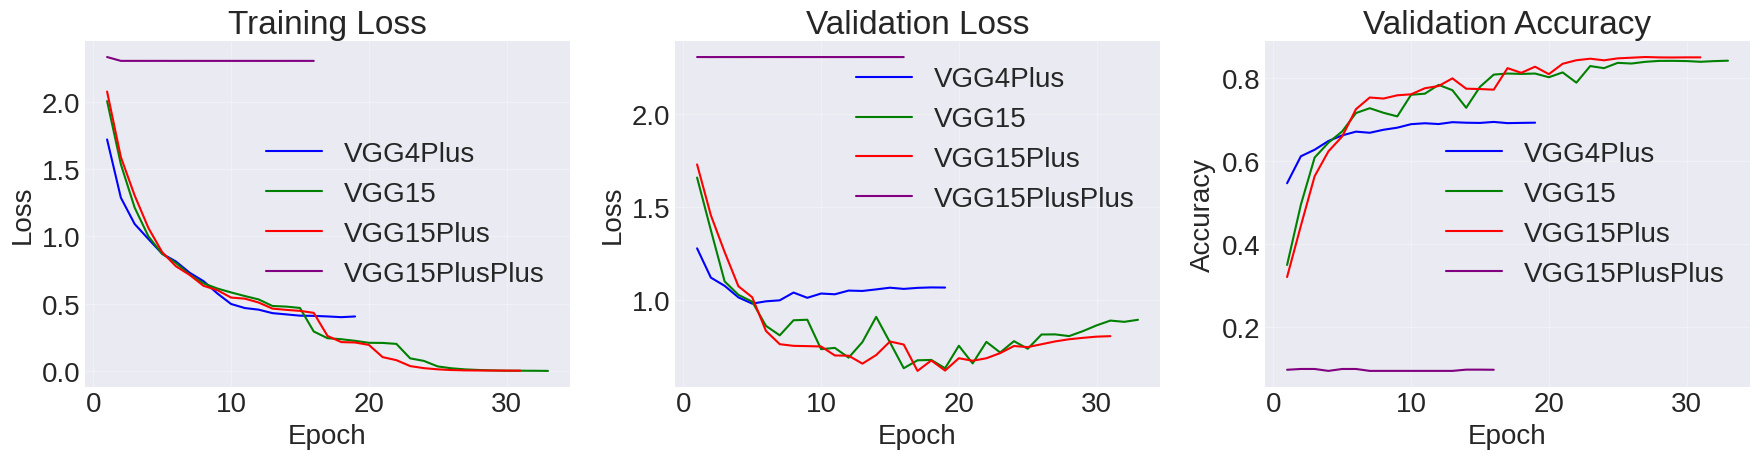

CIFAR-10 test accuracy:
VGG4Plus: 68.83%
VGG15: 83.58%
VGG15Plus: 84.62%
VGG15PlusPlus: 9.99%


In [16]:
# Now use the function to plot your results
plot_loss_acc_x3(train_losses_bn, val_losses_bn, val_accs_bn, epochs_bn)

# Print test accuracies in the requested format
print('CIFAR-10 test accuracy:')
for i in range(len(net_names)):
    print(f'{net_names[i]}: {100*accs_bn[i]:.2f}%')

### 10c. Questions

**Question 14** What did the results of this experiment reveal about the relationship about network depth/size and classification accuracy? Please be specific.

**Question 15** Are there any downsides to the highest performing network (or is it just totally awesome :)?

**Answer 14:** 

**Answer 15:** 

## Extensions

### General guidelines

1. Never integrate extensions into your base project so that they change the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.
2. Check the rubric to keep in mind how extensions on this project will be graded.
3. While I may consult your code and "written log" of what you did, **I am grading your extensions based on what you present in your 3-5 min video.**
3. I suggest documenting your explorations in a "log" or "lab notebook" style (i.e. documenting your thought/progression/discovery/learning process). I'm not grading your writing, so you can keep it succinct. **Whatever is most useful to you to remember what you did.** 
4. I suggest taking a hypothesis driven approach. For example "I was curious about X so I explored Y. I found Z, which was not what I expected because..., so then tried A..."
5. Make plots to help showcase your results.
6. **More is not necessarily better.** Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

### AI guidelines

You may use AI in mostly any capacity for extensions. However, keep in mind:
1. There is no need to use AI at all!
2. You are welcome to use AI as a tool (e.g. automate something that is tedious, help you get unstuck, etc.). However, you should be coding, you should be thinking, you should be writing, you should be creating. If you are spending most (or even close to most) of your time typing into a chatbot and copy-pasting, you have probably gone too far with AI use.
3. I don't find large volumes of AI generated code/text/plots to be particularly impressive and you risk losing my interest while grading. Remember: I'm grading your extensions based on your video presentation. **More is not necessarily better.**

### Video guidelines

1. Please try to keep your video to 5 minutes (*I have other projects to grade!*). If you turn in a longer video, I make no promise that I will watch more than 5 minutes.
2. Your screen should be shared as you show me what you did. A live video of your face should also appear somewhere on the screen (e.g. picture-in-picture overlay / split screen).
3. Your partner should join you for the video and take turns talking, but, if necessary, it is fine to have one team member present during the record the video.
4. Do not simply read text from your notebook, do not read from a prepared script. I am not grading how polished your video presentation is (see extension grading criteria on rubric). 
5. I am looking for original and creative explorations sparked by your curiosity/interest/passion in a topic. This should be apparent in your video.
6. Be natural,, don't feel the need to impress me with fancy language. If it is helpful, imagine that we are talking one-on-one about your extension. Tell me what you did :)

### Extension ideas

#### 1. Tune hyperparameters to achieve even better classification accuracy

Try to squeeze out a few extra percent test accuracy!

#### 2. Other image datasets

You now have a family of fast, high performing neural networks ranging in size. Apply them to another dataset of your choice. 

#### 3. AlexNet

Research the original AlexNet architecture and create a network that implements it. *You may have to ignore a few "hacks" Krizhevsky and colleagues had to perform — as pioneers, they were operating at the absolute limit of what GPUs of the day could do!*

#### 4. Add support for saving/loading network weights

A key limitation of your current deep learning library is that parameters that capture the learning in networks are completely reset/lost/wiped out when the notebook kernel is terminated. Add (and test!) support for saving network parameters to disk after (or periodically during) training. Add (and test!) support for loading network parameters back into the network from disk before training. 

Be careful to include the moving mean and standard deviation parameters in batch normalization layers otherwise the whole net will not work!

#### 5. VGG15 vs. VGG16

VGG16 has another Block of Dense layers compared to VGG15. Additionally, the VGG nets in the paper use 4096 dense units per Dense layer (vs 512 in your nets). Is deeper and more units better? Try it out!